In [1]:
import numpy as np
import matplotlib.pyplot as plt

def bandit(strategy, n_arms, n_steps, n_runs, param=None):
    avg_rewards = np.zeros(n_steps)
    optimal_action_counts = np.zeros(n_steps)

    for run in range(n_runs):
        Q = np.zeros(n_arms)
        N = np.zeros(n_arms)
        true_rewards = np.random.normal(0, 1, n_arms)
        optimal_action = np.argmax(true_rewards)

        for step in range(n_steps):
            action = strategy(Q, N, step, param)
            reward = np.random.normal(true_rewards[action], 1)
            N[action] += 1
            Q[action] += (reward - Q[action]) / N[action]

            avg_rewards[step] += reward
            if action == optimal_action:
                optimal_action_counts[step] += 1

    avg_rewards /= n_runs
    optimal_action_percents = optimal_action_counts / n_runs * 100  # percentage
    return avg_rewards, optimal_action_percents

def epsilon_greedy(Q, N, step, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(Q))
    else:
        return np.argmax(Q)

def ucb(Q, N, step, c):
    if step < len(Q):
        return step
    else:
        confidence_bounds = Q + c * np.sqrt(np.log(step) / (N + 1e-10))  # to avoid division by zero
        return np.argmax(confidence_bounds)


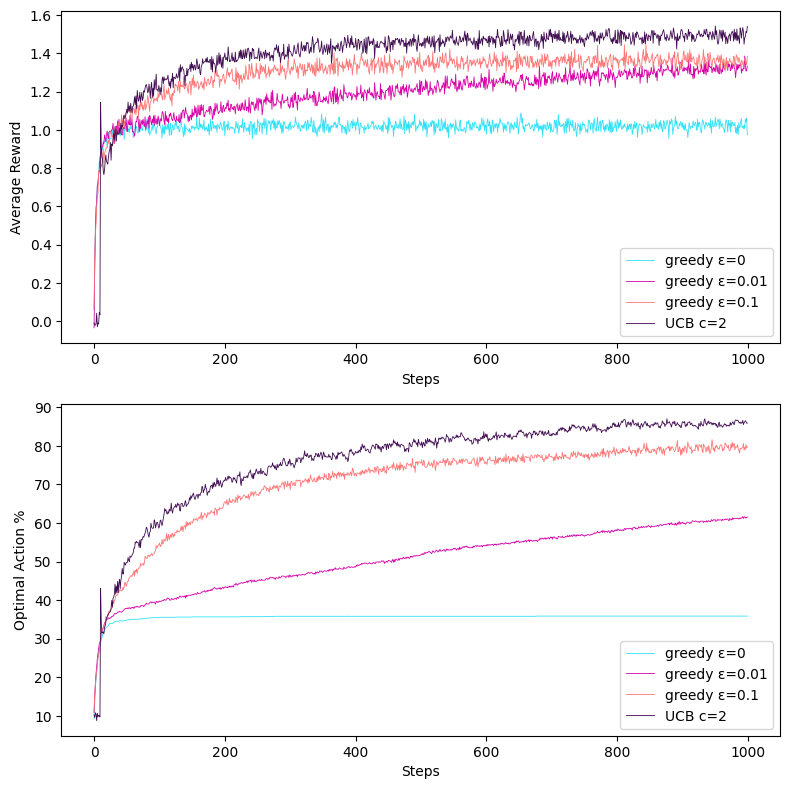

In [2]:
# Parameters
n_arms = 10
n_steps = 1000
n_runs = 2000

def show_plots(strategies, params, n_arms, n_steps, n_runs):
    colors = ['#31E1F7', '#D800A6', '#FF7777', '#400D51']
    plt.figure(figsize=(8, 8))
    # Average Reward
    plt.subplot(2, 1, 1)
    for strategy, param, color, label in zip(strategies, params, colors, labels):
        avg_rewards, _ = bandit(strategy, n_arms, n_steps, n_runs, param)
        plt.plot(avg_rewards, color=color, label=label, linewidth=0.6)
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.legend(loc='lower right')
    # Optimal Action %
    plt.subplot(2, 1, 2)
    for strategy, param, color, label in zip(strategies, params, colors, labels):
        _, optimal_action_percents = bandit(strategy, n_arms, n_steps, n_runs, param)
        plt.plot(optimal_action_percents, color=color, label=label, linewidth=0.6)
    plt.xlabel('Steps')
    plt.ylabel('Optimal Action %')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

# strategies and parameter lists
strategies = [epsilon_greedy, epsilon_greedy, epsilon_greedy, ucb]
params = [0, 0.01, 0.1, 2]
labels = ['greedy ε=0', 'greedy ε=0.01', 'greedy ε=0.1', 'UCB c=2']
# show plots
show_plots(strategies, params, n_arms, n_steps, n_runs)

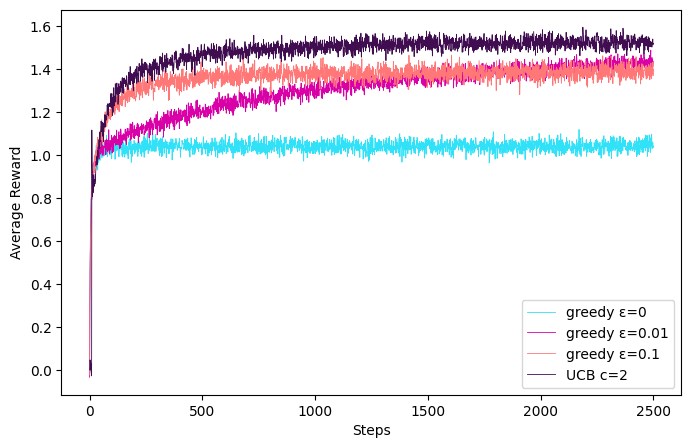

In [7]:
# Parameters
n_arms = 10
n_steps = 2500
n_runs = 2000

def show_plots(strategies, params, n_arms, n_steps, n_runs):
    colors = ['#31E1F7', '#D800A6', '#FF7777', '#400D51']
    plt.figure(figsize=(8, 5))
    # Average Reward
    for strategy, param, color, label in zip(strategies, params, colors, labels):
        avg_rewards, _ = bandit(strategy, n_arms, n_steps, n_runs, param)
        plt.plot(avg_rewards, color=color, label=label, linewidth=0.6)
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.legend(loc='lower right')

# strategies and parameter lists
strategies = [epsilon_greedy, epsilon_greedy, epsilon_greedy, ucb]
params = [0, 0.01, 0.1, 2]
labels = ['greedy ε=0', 'greedy ε=0.01', 'greedy ε=0.1', 'UCB c=2']
# show plots
show_plots(strategies, params, n_arms, n_steps, n_runs)

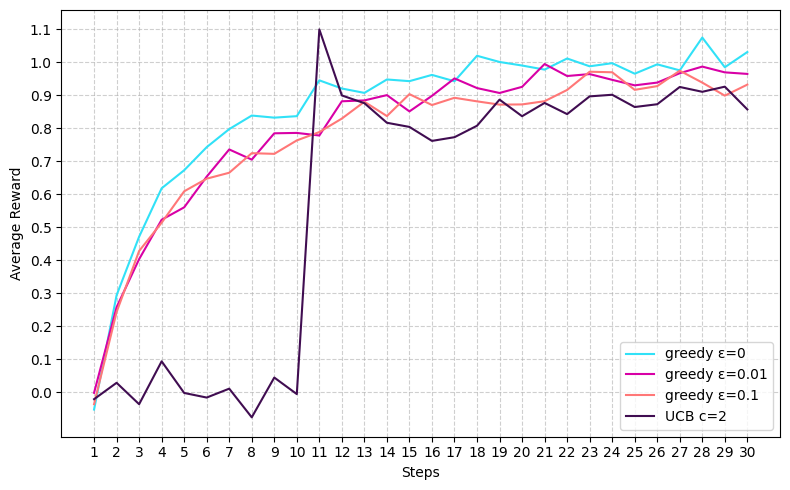

In [8]:
n_arms = 10
n_steps = 31
n_runs = 2000

strategies = [epsilon_greedy, epsilon_greedy, epsilon_greedy, ucb]
params = [0, 0.01, 0.1, 2]
labels = ['greedy ε=0', 'greedy ε=0.01', 'greedy ε=0.1', 'UCB c=2']
# plot for the first 30 steps
colors = ['#31E1F7', '#D800A6', '#FF7777', '#400D51']
plt.figure(figsize=(8, 5))
for strategy, param, color, label in zip(strategies, params, colors, labels):
    avg_rewards, _ = bandit(strategy, n_arms, n_steps, n_runs, param)
    plt.plot(range(1, 31), avg_rewards[:30], color=color, label=label)
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(1, 31))
plt.yticks(np.arange(0, max(avg_rewards[:30]) + 0.1, 0.1))
plt.tight_layout()
plt.show()

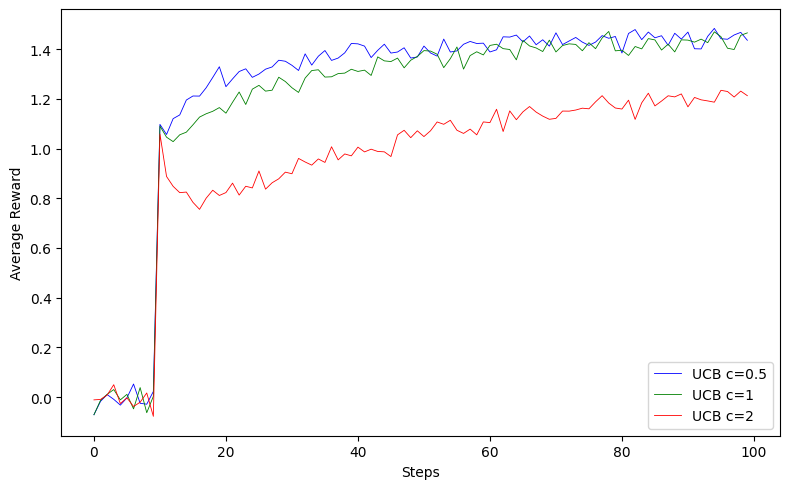

In [9]:
n_arms = 10
n_steps = 100
n_runs = 2000

# defferent c for UCB
strategies = [ucb, ucb, ucb]
params = [0.5, 1, 2]
labels = ['UCB c=0.5', 'UCB c=1', 'UCB c=2']
colors = ['b', 'g', 'r']
# show plots
plt.figure(figsize=(8, 5))
for strategy, param, color, label in zip(strategies, params, colors, labels):
    avg_rewards, _ = bandit(strategy, n_arms, n_steps, n_runs, param)
    plt.plot(avg_rewards, color=color, label=label, linewidth=0.6)
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()